<a href="https://colab.research.google.com/github/Mohammed-Saif-07/ML-winter-quarter/blob/main/GUIDED_PART2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1

## Get the data

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# extra code – downloads the ladybug image

import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [4]:
import PIL
import numpy as np
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

## K-Means

In [5]:
from sklearn.cluster import KMeans
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

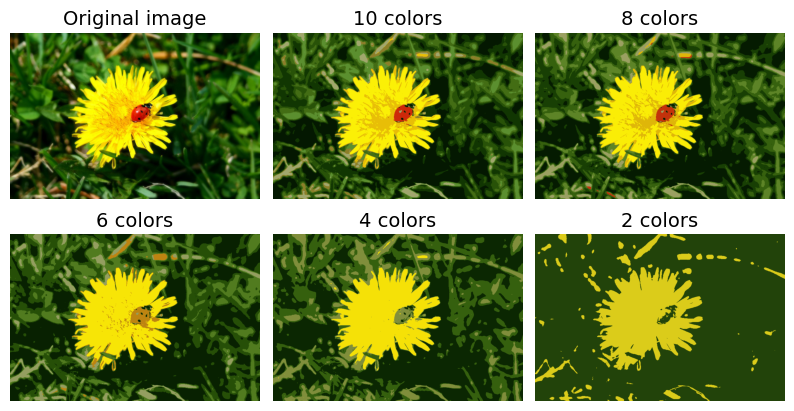

In [6]:

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

save_fig('image_segmentation_plot', tight_layout=False)
plt.show()

# DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10, n_jobs=-1).fit(X)

# Get cluster labels
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Estimated number of clusters: {n_clusters_}')

Estimated number of clusters: 6835


In [8]:
segmented_img_dbscan = np.copy(X).astype(float)
for i in range(n_clusters_):
    cluster_mask = (labels == i)
    if np.any(cluster_mask):
        cluster_mean_color = X[cluster_mask].mean(axis=0)
        segmented_img_dbscan[cluster_mask] = cluster_mean_color
segmented_img_dbscan[labels == -1] = [0, 0, 0]

segmented_img_dbscan = segmented_img_dbscan.reshape(image.shape)

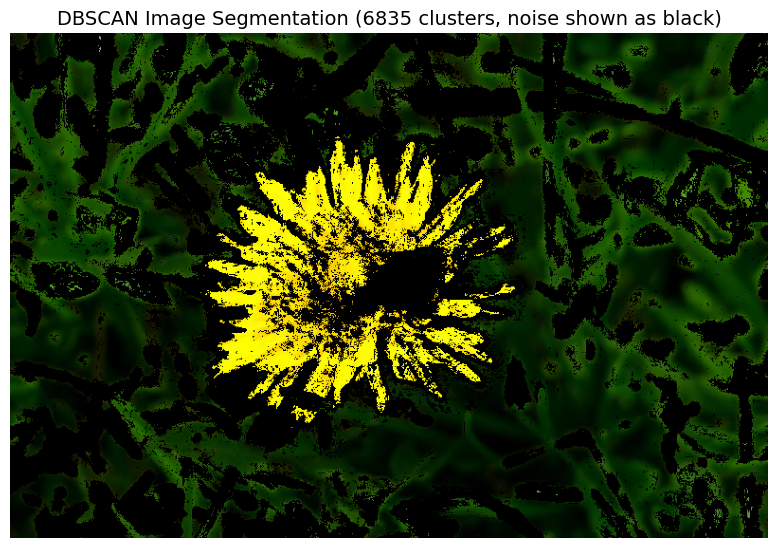

In [9]:
plt.figure(figsize=(8, 6))
plt.imshow(segmented_img_dbscan / 255) # Divide by 255 to normalize pixel values for display
plt.title(f'DBSCAN Image Segmentation ({n_clusters_} clusters, noise shown as black)')
plt.axis('off')
save_fig('dbscan_image_segmentation_plot')
plt.show()
